# 9 Split a dataframe into several dataframes (Infected samples)

Made by: Cynthia Soto <br>
Date: March 10 2021 <br>
Last md: xxxx <br>

Assumptions:
Data are normalized, filtered and standarized accordingly with the specifications. <br>

**Workflow:** <br>
1) Split the main dataframe into several df <br>
2) Check zeros remaining by df  <br>
3) Basic statistics by df  <br>

In [166]:
# Libraries required
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")          

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/matrices_de_expresion


## Funtions to be called in the file

In [262]:
# Rename columns on  a df according to your story
def set_ID_samples(df):
    df = df.rename(columns={'SRR10586397': 'Bc24', 'SRR364399':'Ch40.3','SRR364401':'Ch40',
                                         'SRR6283148':'Ss30','SRR6283147':'Ss30.1','SRR3383696':'Bc12',
                                         'SRR3383780':'Bc18','SRR6283146':'Ss30.2','SRR3383779':'Bc18.1',
                                         'SRR3383697':'Bc12.1','SRR364390':'Ch22','SRR364389':'Ch22.1',
                                         'SRR364400':'Ch40.1','SRR364391':'Ch22.2','SRR10586399':'Bc24.1',
                                         'SRR364392':'Ch22.3','SRR364398':'Ch40.2'})
    return df 

In [263]:
def join_df_save(df_g, df_x, file_n):
    try:
        df_split = pd.concat([df_g, df_x], axis=1)
        #df_split.to_csv(file_n, sep='\t', index=False)
        res = True
    except:
        res= False
    return res
    

## (end) Funtions 

In [264]:
## load file
#df = pd.read_csv("all_infected_Log2_17ceros_drop.csv", sep='\t', header=0)    ## nrows=100, 
df = pd.read_csv("all_infected_Log2_17ceros_Q3_drop.csv", sep='\t', header=0)    ## nrows=100, 

## remove unnamed cols (several if needed)
df.drop(df.columns[df.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df.drop(['zero-counter'], axis=1, inplace=True)
df.head(3)

,Genes,SRR10586397,SRR364399,SRR364401,SRR6283148,SRR6283147,SRR3383696,SRR3383780,SRR6283146,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364400,SRR364391,SRR10586399,SRR364392,SRR364398
0,AT1G01090,11.240791,9.197217,9.074141,8.581201,8.668885,10.417853,10.787086,9.501837,10.422065,10.658211,9.726218,9.640245,9.264443,9.643856,11.102632,9.746514,9.330917
1,AT1G01120,9.481799,7.918863,8.675957,11.512247,12.283088,11.527477,8.971544,12.009479,10.094078,11.903882,8.994353,9.047124,8.507795,10.292322,9.370687,10.277287,8.011227
2,AT1G01140,11.418907,10.277287,10.348728,9.214319,9.136991,10.660887,11.643856,9.513728,10.801708,11.009829,10.500842,10.548822,10.328675,10.820977,11.549303,10.767357,10.287712


In [265]:
# call a function to set label sample's as IDs
df = set_ID_samples(df)
df.head(3)

,Genes,Bc24,Ch40.3,Ch40,Ss30,Ss30.1,Bc12,Bc18,Ss30.2,Bc18.1,Bc12.1,Ch22,Ch22.1,Ch40.1,Ch22.2,Bc24.1,Ch22.3,Ch40.2
0,AT1G01090,11.240791,9.197217,9.074141,8.581201,8.668885,10.417853,10.787086,9.501837,10.422065,10.658211,9.726218,9.640245,9.264443,9.643856,11.102632,9.746514,9.330917
1,AT1G01120,9.481799,7.918863,8.675957,11.512247,12.283088,11.527477,8.971544,12.009479,10.094078,11.903882,8.994353,9.047124,8.507795,10.292322,9.370687,10.277287,8.011227
2,AT1G01140,11.418907,10.277287,10.348728,9.214319,9.136991,10.660887,11.643856,9.513728,10.801708,11.009829,10.500842,10.548822,10.328675,10.820977,11.549303,10.767357,10.287712


**Take an overview of the central values and distributions**

**sns.violinplot is a mathplot extention which plots a violin plot** <br>
Violin plots are used to visualize data distributions, displaying the range, median, and distribution of the data.<br>
Violin plots show the same summary statistics as box plots, but they also include Kernel Density Estimations that represent the shape/distribution of the data.<br>
**sns.swarmplot is a mathplot extention too** <br>
Here we overlay a Swarmplot onto the Violin Plot in order to see the distribution and samples of the points comprising that distribution. <br>
**Note: this is a heavy process**

In [266]:
dfx = df

In [267]:
## Assign the column to a pandas serie for botrytis
Bc12 = dfx['Bc12']
Bc12r = dfx['Bc12.1']
Bc18 = dfx['Bc18']
Bc18r = dfx['Bc18.1']
Bc24 = dfx['Bc24']
Bc24r = dfx['Bc24.1']
## Assign the column to a pandas serie for Ss
Ss = dfx['Ss30']
Ssr1 = dfx['Ss30.1']
Ssr2 = dfx['Ss30.2']
## Assign the column to a pandas serie for Colletotrichum
Ch22 = dfx['Ch22']
Ch22r1 = dfx['Ch22.1']
Ch22r2 = dfx['Ch22.2']
Ch22r3 = dfx['Ch22.3']
Ch40 = dfx['Ch40']
Ch40r1 = dfx['Ch40.1']
Ch40r2 = dfx['Ch40.2']
Ch40r3 = dfx['Ch40.3']

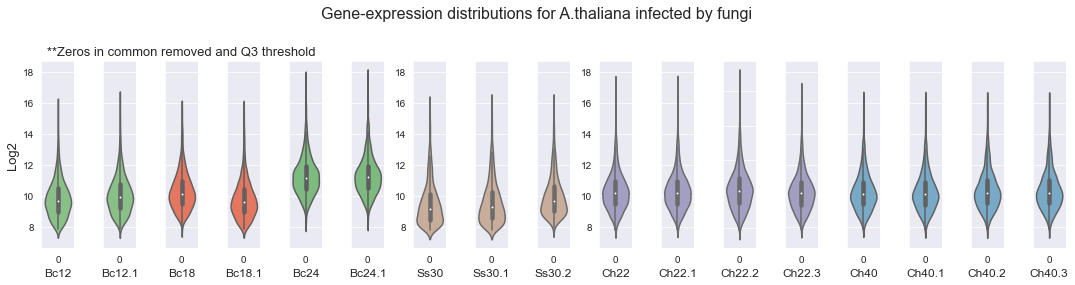

In [270]:
fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, 17)
sns.set_palette("RdBu")
sns.set_style("darkgrid")

ax1 = fig.add_subplot(gs[0, 0])
sns.violinplot(data=Bc12, palette='Accent')
ax1.set_xlabel("Bc12", fontsize=12)
ax1.set_ylabel("Log2",fontsize=13)

ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
sns.violinplot(data=Bc12r, palette='Accent')
ax2.set_xlabel("Bc12.1", fontsize=12)

ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)
sns.violinplot(data=Bc18, palette='Reds')
ax3.set_xlabel("Bc18", fontsize=12)
ax3.set_title('**Zeros in common removed and Q3 threshold',fontsize=13)

ax4 = fig.add_subplot(gs[0, 3], sharey=ax1)
sns.violinplot(data=Bc18r, palette='Reds')
ax4.set_xlabel("Bc18.1", fontsize=12)

ax5 = fig.add_subplot(gs[0, 4], sharey=ax1)
sns.violinplot(data=Bc24, palette='Greens')
ax5.set_xlabel("Bc24", fontsize=12)

ax6 = fig.add_subplot(gs[0, 5], sharey=ax1)
sns.violinplot(data=Bc24r, palette='Greens')
ax6.set_xlabel("Bc24.1", fontsize=12)

## Sclerotinia
ax7 = fig.add_subplot(gs[0, 6], sharey=ax1)
sns.violinplot(data=Ss, palette='pink')
ax7.set_xlabel("Ss30", fontsize=12)

ax8 = fig.add_subplot(gs[0, 7], sharey=ax1)
sns.violinplot(data=Ssr1, palette='pink')
ax8.set_xlabel("Ss30.1", fontsize=12)

ax9 = fig.add_subplot(gs[0, 8], sharey=ax1)
sns.violinplot(data=Ssr2, palette='pink')
ax9.set_xlabel("Ss30.2", fontsize=12)

## Colletrotrichum
ax10 = fig.add_subplot(gs[0, 9], sharey=ax1)
sns.violinplot(data=Ch22, palette='Purples')
ax10.set_xlabel("Ch22", fontsize=12)

ax11 = fig.add_subplot(gs[0, 10], sharey=ax1)
sns.violinplot(data=Ch22r1, palette='Purples')
ax11.set_xlabel("Ch22.1", fontsize=12)

ax12 = fig.add_subplot(gs[0, 11])
sns.violinplot(data=Ch22r2, palette='Purples')
ax12.set_xlabel("Ch22.2", fontsize=12)

ax13 = fig.add_subplot(gs[0, 12], sharey=ax1)
sns.violinplot(data=Ch22r3, palette='Purples')
ax13.set_xlabel("Ch22.3", fontsize=12)

ax14 = fig.add_subplot(gs[0, 13], sharey=ax1)
sns.violinplot(data=Ch40, palette='Blues')
ax14.set_xlabel("Ch40", fontsize=12)

ax15 = fig.add_subplot(gs[0, 14], sharey=ax1)
sns.violinplot(data=Ch40r1, palette='Blues')
ax15.set_xlabel("Ch40.1", fontsize=12)

ax16 = fig.add_subplot(gs[0, 15], sharey=ax1)
sns.violinplot(data=Ch40r2, palette='Blues')
ax16.set_xlabel("Ch40.2", fontsize=12)

ax17 = fig.add_subplot(gs[0, 16], sharey=ax1)
sns.violinplot(data=Ch40r3, palette='Blues')
ax17.set_xlabel("Ch40.3", fontsize=12)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)
#plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax9.get_yticklabels(), visible=False)
#plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax12.get_yticklabels(), visible=False)
plt.setp(ax13.get_yticklabels(), visible=False)
plt.setp(ax14.get_yticklabels(), visible=False)
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax16.get_yticklabels(), visible=False)
plt.setp(ax17.get_yticklabels(), visible=False)

#plt.setp([ax1, ax2, ax3, ax4], title='Test')
fig.suptitle("Gene-expression distributions for A.thaliana infected by fungi", fontsize=16)
gs.tight_layout(fig, rect=[0, 0, 1, 0.97])


**Suposse I wish to divide this df into 3 df under certain pattern** <br>
In this case, I want to separate the df by fungi type interaction <br>
1) Bc (Botrytis cinerea, 3 series-time points) <br>
2) Sc (Sclerotinia sclerotorium, 1 series-time point) <br>
3) Ch (Colletotrichum h, 2 series-time point)<br>

In [186]:
## First we extract the genes names (will be used for all the dfs)
df_g =  df[['Genes']]
df_g.head(3)

,Genes
0,AT1G01010
1,AT1G01020
2,AT1G01030


**First df: Botrytis**

In [187]:
dfx = df[df.columns[df.columns.to_series().str.contains('Bc')]]
dfx.head(3)

,Bc24,Bc12,Bc18,Bc18.1,Bc12.1,Bc24.1
0,8.577429,6.539159,7.044394,6.044394,6.988685,8.607330
1,7.228819,7.149747,7.400879,6.918863,7.375039,7.139551
2,5.727920,2.807355,4.523562,4.321928,4.392317,5.906891


In [188]:
## To avoid repeat this chunck in each pattern we will use a function
    #df_split = pd.concat([df_g, dfBc], axis=1)
    #df_split.head(3)
    #df_split.to_csv('all_Bc_log2.csv', sep='\t', index=False)

In [189]:
print('Data saved:',join_df_save(df_g, dfx, 'all_Bc_log2.csv'))

Data saved: True


In [190]:
## Assign the column to a pandas serie for botrytis
Bc12 = dfx['Bc12']
Bc12r = dfx['Bc12.1']
Bc18 = dfx['Bc18']
Bc18r = dfx['Bc18.1']
Bc24 = dfx['Bc24']
Bc24r = dfx['Bc24.1']

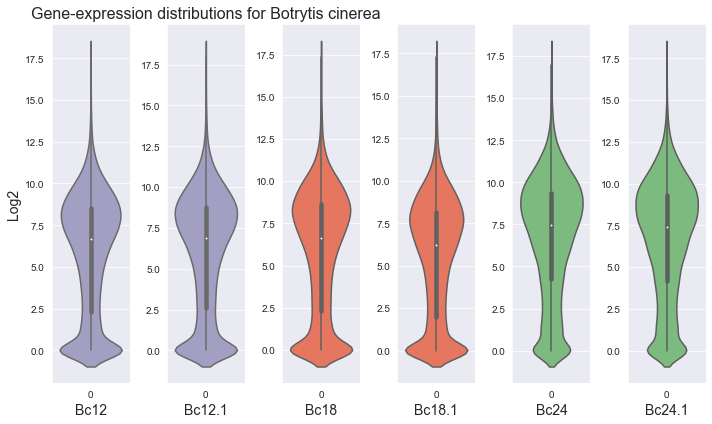

In [191]:
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 6)
sns.set_palette("RdBu")
sns.set_style("darkgrid")   #darkgrid, whitegrid

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=Bc12, palette='Purples')
ax.set_xlabel("Bc12", fontsize=14)
ax.set_ylabel("Log2", fontsize=14)
#sns.swarmplot(data=Bc12, color="k", alpha=0.8)   (it require a lot of memory)
#Overlaying Swarmplot Over Violin Plot in Seaborn

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=Bc12r, palette='Purples')
ax.set_xlabel("Bc12.1", fontsize=14)
ax.set_title("Gene-expression distributions for Botrytis cinerea", fontsize=16)

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=Bc18, palette='Reds')
ax.set_xlabel("Bc18", fontsize=14)

ax = fig.add_subplot(gs[0, 3])
sns.violinplot(data=Bc18r, palette='Reds')
ax.set_xlabel("Bc18.1", fontsize=14)

ax = fig.add_subplot(gs[0, 4])
sns.violinplot(data=Bc24, palette='Greens')
ax.set_xlabel("Bc24", fontsize=14)

ax = fig.add_subplot(gs[0, 5])
sns.violinplot(data=Bc24r, palette='Greens')
ax.set_xlabel("Bc24.1", fontsize=14)

fig.tight_layout()
plt.show()

**Second df: Sclerotinia**

In [192]:
dfx = df[df.columns[df.columns.to_series().str.contains('Ss')]]
dfx.head(3)

,Ss30,Ss30.1,Ss30.2
0,3.000000,5.614710,5.781360
1,5.129283,5.357552,5.285402
2,4.459432,5.087463,5.392317


In [193]:
print('Data saved:',join_df_save(df_g, dfx, 'all_Ss_log2.csv'))

Data saved: True


In [194]:
## Assign the column to a pandas serie for Ss
Ss = dfx['Ss30']
Ssr1 = dfx['Ss30.1']
Ssr2 = dfx['Ss30.2']

In [150]:
Ss

0        3.000000
1        5.129283
2        4.459432
3        6.228819
4        4.700440
           ...   
24235    0.000000
24236    5.000000
24237    3.906891
24238    0.000000
24239    1.584963
Name: Ss30, Length: 24240, dtype: float64

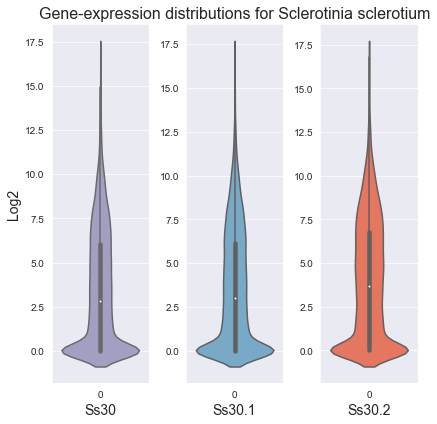

In [195]:
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(1, 3)
sns.set_palette("RdBu")
sns.set_style("darkgrid")

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=Ss, palette='Purples')
ax.set_xlabel("Ss30", fontsize=14)
ax.set_ylabel("Log2", fontsize=14)

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=Ssr1, palette='Blues')
ax.set_xlabel("Ss30.1", fontsize=14)
ax.set_title("Gene-expression distributions for Sclerotinia sclerotium", fontsize=16)

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=Ssr2, palette='Reds')
ax.set_xlabel("Ss30.2", fontsize=14)

fig.tight_layout()
plt.show()

**Third df: Coletotrichum**

In [196]:
dfx = df[df.columns[df.columns.to_series().str.contains('Ch')]]
dfx.head(3)

,Ch40.3,Ch40,Ch22,Ch22.1,Ch40.1,Ch22.2,Ch22.3,Ch40.2
0,6.930737,7.098032,6.965784,6.977280,7.033423,7.209453,7.149747,6.942515
1,6.727920,7.000000,7.467606,7.330917,6.954196,7.531381,7.643856,6.954196
2,3.584963,3.807355,3.169925,3.169925,3.000000,3.459432,3.000000,3.459432


In [197]:
print('Data saved:',join_df_save(df_g,dfx,'all_Ch_log2.csv'))

Data saved: True


In [198]:
## Assign the column to a pandas serie for Colletotrichum
Ch22 = dfx['Ch22']
Ch22r1 = dfx['Ch22.1']
Ch22r2 = dfx['Ch22.2']
Ch22r3 = dfx['Ch22.3']
Ch40 = dfx['Ch40']
Ch40r1 = dfx['Ch40.1']
Ch40r2 = dfx['Ch40.2']
Ch40r3 = dfx['Ch40.3']

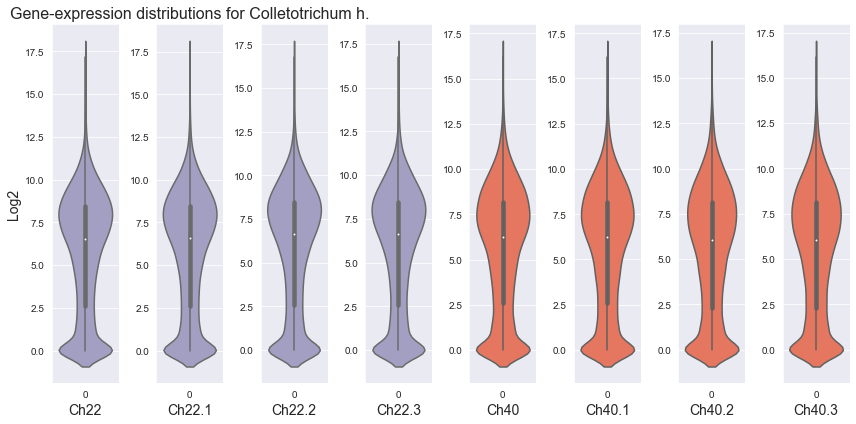

In [199]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 8)
sns.set_palette("RdBu")
sns.set_style("darkgrid")

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=Ch22, palette='Purples')
ax.set_xlabel("Ch22", fontsize=14)
ax.set_ylabel("Log2", fontsize=14)

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=Ch22r1, palette='Purples')
ax.set_xlabel("Ch22.1", fontsize=14)
ax.set_title("Gene-expression distributions for Colletotrichum h.", fontsize=16)

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=Ch22r2, palette='Purples')
ax.set_xlabel("Ch22.2", fontsize=14)

ax = fig.add_subplot(gs[0, 3])
sns.violinplot(data=Ch22r3, palette='Purples')
ax.set_xlabel("Ch22.3", fontsize=14)

ax = fig.add_subplot(gs[0, 4])
sns.violinplot(data=Ch40, palette='Reds')
ax.set_xlabel("Ch40", fontsize=14)

ax = fig.add_subplot(gs[0, 5])
sns.violinplot(data=Ch40r1, palette='Reds')
ax.set_xlabel("Ch40.1", fontsize=14)

ax = fig.add_subplot(gs[0, 6])
sns.violinplot(data=Ch40r2, palette='Reds')
ax.set_xlabel("Ch40.2", fontsize=14)

ax = fig.add_subplot(gs[0, 7])
sns.violinplot(data=Ch40r3, palette='Reds')
ax.set_xlabel("Ch40.3", fontsize=14)

fig.tight_layout()
plt.show()

In [200]:
df_split.head(3)

,Genes,Bc24,Bc12,Bc18,Bc18.1,Bc12.1,Bc24.1
0,AT1G01010,8.577429,6.539159,7.044394,6.044394,6.988685,8.607330
1,AT1G01020,7.228819,7.149747,7.400879,6.918863,7.375039,7.139551
2,AT1G01030,5.727920,2.807355,4.523562,4.321928,4.392317,5.906891
